In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# plt.rcParams['text.usetex']=True
# import matplotlib
# from matplotlib import rc
# % matplotlib inline
# matplotlib.rcParams['text.usetex']=True
# matplotlib.rcParams['text.latex.unicode']=True
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)
# http://bach.istc.kobe-u.ac.jp/lect/tamlab/ubuntu/latex.html

In [2]:
dir(stats)

['PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 

In [18]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous
print(stats.__doc__)
print(stats.__file__)


.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
 

In [6]:
print(stats.rv_continuous.__doc__)


    A generic continuous random variable class meant for subclassing.

    `rv_continuous` is a base class to construct specific distribution classes
    and instances for continuous random variables. It cannot be used
    directly as a distribution.

    Parameters
    ----------
    momtype : int, optional
        The type of generic moment calculation to use: 0 for pdf, 1 (default)
        for ppf.
    a : float, optional
        Lower bound of the support of the distribution, default is minus
        infinity.
    b : float, optional
        Upper bound of the support of the distribution, default is plus
        infinity.
    xtol : float, optional
        The tolerance for fixed point calculation for generic ppf.
    badvalue : float, optional
        The value in a result arrays that indicates a value that for which
        some argument restriction is violated, default is np.nan.
    name : str, optional
        The name of the instance. This string is used to construct the def

In [15]:
# 正規分布
print(stats.norm.__doc__)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale

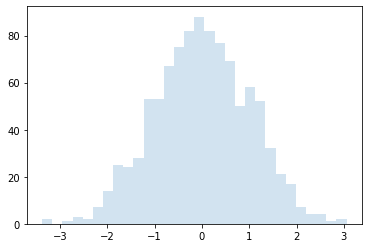

In [19]:
s = stats.norm.rvs(size=1000) # 確率分布にしたがってランダムサンプリング

# 可視化
fig, ax1 = plt.subplots(1, 1)
ax1.hist(s, bins=30, histtype='stepfilled', alpha=0.2)
plt.show()

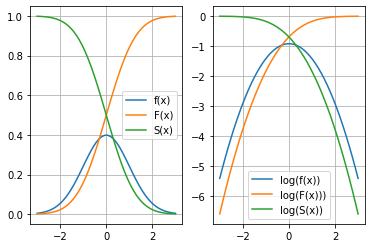

In [5]:
x = np.linspace(-3, 3, 50)


fx = stats.norm.pdf(x) # pdf (probability density function): 確率密度関数 f(x)
Fx = stats.norm.cdf(x) # cdf (cumulative distribution function): 累積分布関数 F(x)
Sx = stats.norm.sf(x) # sf (survival function): 生存関数 1 - F(x)

log_fx = stats.norm.logpdf(x) # log(f(x))
log_Fx = stats.norm.logcdf(x) # log(F(x))
log_Sx = stats.norm.logsf(x)  # log(1 - F(x))

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, fx, label=r'f(x)')
ax1.plot(x, Fx, label=r'F(x)')
ax1.plot(x, Sx, label=r'S(x)')
ax1.grid(True)
ax1.legend()
ax2.plot(x, log_fx, label=r'log(f(x))')
ax2.plot(x, log_Fx, label=r'log(F(x)))')
ax2.plot(x, log_Sx, label=r'log(S(x))')
ax2.grid(True)
ax2.legend()
plt.show()

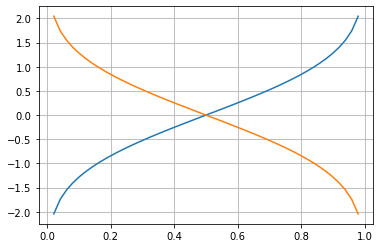

In [6]:
x = np.linspace(0, 1, 50)

I_Fx = stats.norm.ppf(x) # ppf (Percent point function): F(x) の逆関数
I_Sx = stats.norm.isf(x) # isf (inverse survival function): S(x) の逆関数
fig, (ax1) = plt.subplots(1, 1)

# 可視化
ax1.plot(x, I_Fx)
ax1.plot(x, I_Sx)
ax1.grid(True)
plt.show()

In [11]:
print(stats.norm.stats(moments='mvsk'))

print('mean', stats.norm.mean()) # 平均値
print('median', stats.norm.median()) # 中央値 
print('std', stats.norm.std()) # 標準偏差  
print('var', stats.norm.var()) # 分散
print('interval(f,alpha)', stats.norm.interval(0.95)) # α信頼区間
print('supp(f)', stats.norm.support()) # 非ゼロ定義域 supp(f)
for n in range(1,5):
    print('moment', n ,':', stats.norm.moment(n)) # n次モーメント

(array(0.), array(1.), array(0.), array(0.))
mean 0.0
median 0.0
std 1.0
var 1.0
interval(f,alpha) (-1.959963984540054, 1.959963984540054)
supp(f) (-inf, inf)
moment 1 : 0.0
moment 2 : 1.0
moment 3 : 0.0
moment 4 : 3.0


[ 11.95232044  24.02121551  11.19302733  10.11797496   0.51488973
   1.51555869  26.66344243  19.86556024   0.93371675  17.0416619
  11.33948225  11.38960177   7.45264103  -6.28399958  24.48470491
   3.81284828   1.93839105   5.02492958  -4.16481128  16.69646973
   9.36804371  27.81890185   4.3939802    2.93590552   9.77065694
   6.07201952 -12.04090257  11.13960005   9.72270146  13.16945052
   9.03549206   7.59231819   9.52678879  14.31215132   9.72978206
   1.64401603  11.5781724   23.06574056 -21.10582383  22.22736821
  -1.41201664  17.86544168  29.8988372   26.41442071   9.03820046
   7.88158977  14.94921873   9.96987034  10.765962    17.1974351
  12.41262881  23.82813156   7.32512266  21.16577425  24.01785632
   0.11116323   9.1667378    1.10320402  12.24758969  15.92931913
   0.41998413  -0.97417042   3.54619479  34.16326948  -1.68428404
  15.75651321  -0.10795099  -4.06393854  -2.64686775  -1.09442515
  10.95687004   5.98626577  12.7849068   -6.90092194  23.52273479
  -3.4561276

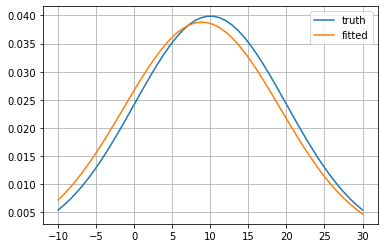

In [13]:
mu = 10
sigma = 10
norm_truth = stats.norm(loc=mu, scale=sigma) # 真の分布 N(mu, sigma)

data = norm_truth.rvs(size=100) 
print(data)

params = stats.norm.fit(data) # 分布推定 
norm_fit = stats.norm(loc=params[0], scale=params[1]) # 推定された分布
print('fitted: ', params)

# 可視化
x = np.linspace(mu-2*sigma, mu+2*sigma, 50)

fx_truth = norm_truth.pdf(x)
fx_fit = norm_fit.pdf(x) 

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, fx, label='truth')
ax1.plot(x, fx_fit, label='fitted')
ax1.grid(True)
ax1.legend()
plt.show()